<a href="https://colab.research.google.com/github/Ranjani94/Machine_Learning/blob/master/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection, Cleaning, Amalgamation

### Mounting drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### File path and data frames


In [0]:
aqiFilePath = base_dir + '/aqidaily_2016_to_2019.csv'
weatherFilePath = base_dir + '/bakersfield_weather_2016_to_2019.csv'

In [0]:
import pandas as pd
import numpy as np

In [0]:
aqiDataFrame = pd.read_csv(aqiFilePath)
weatherDataFrame = pd.read_csv(weatherFilePath)

In [0]:
aqiDataFrame.head(2)

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2
0,1/1/16,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23
1,1/2/16,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25


In [0]:
weatherDataFrame.head(2)

,date,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,2016-01-01,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,2016-01-02,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Column names to lower case

In [0]:
aqiDataFrame.columns = map(str.lower, aqiDataFrame.columns)
aqiDataFrame.columns

Index(['date', 'overall aqi value', 'main pollutant',
       'site name (of overall aqi)', 'site id (of overall aqi)',
       'source (of overall aqi)', 'co', 'ozone', 'pm10', 'pm25', 'no2'],
      dtype='object')

### Common date format

In [0]:
aqiDataFrame['date'] = pd.to_datetime(aqiDataFrame['date']).dt.strftime('%m/%d/%Y')
weatherDataFrame['date'] = pd.to_datetime(weatherDataFrame['date']).dt.strftime('%m/%d/%Y')

In [0]:
aqiDataFrame.head(2)

,date,overall aqi value,main pollutant,site name (of overall aqi),site id (of overall aqi),source (of overall aqi),co,ozone,pm10,pm25,no2
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25


In [0]:
weatherDataFrame.head(2)

,date,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Merging the datasets

In [0]:
df = pd.merge(aqiDataFrame, weatherDataFrame, on='date', how='inner')

In [0]:
df.head(2)

,date,overall aqi value,main pollutant,site name (of overall aqi),site id (of overall aqi),source (of overall aqi),co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Renaming column names

In [0]:
df.rename(columns = {'overall aqi value':'aqi', 'site name (of overall aqi)':'location', 'site id (of overall aqi)':'location id',
                     'source (of overall aqi)' : 'aqi source'}, inplace = True) 

In [0]:
df.head(2)

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


In [0]:
df.drop(df.columns[[15,16,17,19,20]], axis=1, inplace=True)

### Shape of DF

In [0]:
df.shape

(1461, 17)

### Columns with NaN 

In [0]:
df.columns[df.isna().any()].tolist()

['precipitation', 'pressure']

### Replacing invalid data with 0

In [0]:
df = df.fillna(0)
df['co'].replace('.','0',inplace=True)
df['no2'].replace('.','0',inplace=True)
df['pm10'].replace('.','0',inplace=True)
df

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,6.5,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,3.6,1017.9
2,01/03/2016,80,PM2.5,Bakersfield-California,06-029-0014,AQS,7,36,9,80,28,9.6,3.9,20.0,0.0,11.5,1011.5
3,01/04/2016,87,PM2.5,Bakersfield-Airport (Planz),06-029-0016,AQS,5,37,8,87,28,10.6,5.6,18.3,0.0,7.2,1008.8
4,01/05/2016,54,PM2.5,Bakersfield-California,06-029-0014,AQS,5,41,6,54,30,12.5,8.3,14.4,12.2,7.6,1008.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,12/27/2019,36,PM2.5,Bakersfield-California,06-029-0014,AirNow,0,33,0,36,0,7.9,3.9,11.7,0.0,4.0,1017.3
1457,12/28/2019,58,PM2.5,Bakersfield-California,06-029-0014,AQS,0,32,2,58,0,7.1,1.7,13.3,0.0,3.2,1020.8
1458,12/29/2019,60,PM2.5,Bakersfield-Golden/M St,06-029-0010,AQS,0,31,3,60,0,7.6,2.8,15.6,0.0,2.9,1019.5
1459,12/30/2019,62,PM2.5,Bakersfield-California,06-029-0014,AQS,0,34,4,62,0,10.4,5.6,13.9,0.0,7.9,1018.4


In [0]:
# c = df['temperature_min'] < 0
# df['temperature_min'] =  df['temperature_min'].astype(float)
# newdf = df[c]
# newdf

In [0]:
df.dtypes

date                object
aqi                  int64
main pollutant      object
location            object
location id         object
aqi source          object
co                  object
ozone                int64
pm10                object
pm25                 int64
no2                 object
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
dtype: object

### Object to Float

In [0]:
def covert_to_float(param):
    df[param] =  df[param].astype(float)

arr = ['aqi','co','no2','pm10']
for i in arr:
    covert_to_float(i)

In [0]:
df.dtypes

date                object
aqi                float64
main pollutant      object
location            object
location id         object
aqi source          object
co                 float64
ozone                int64
pm10               float64
pm25                 int64
no2                float64
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
dtype: object

In [0]:
df.columns[df.isna().any()].tolist()

[]

In [0]:
df.columns

Index(['date', 'aqi', 'main pollutant', 'location', 'location id',
       'aqi source', 'co', 'ozone', 'pm10', 'pm25', 'no2', 'temperature',
       'temperature_min', 'temperature_max', 'precipitation', 'windspeed',
       'pressure'],
      dtype='object')

# Heatmap: Correlation

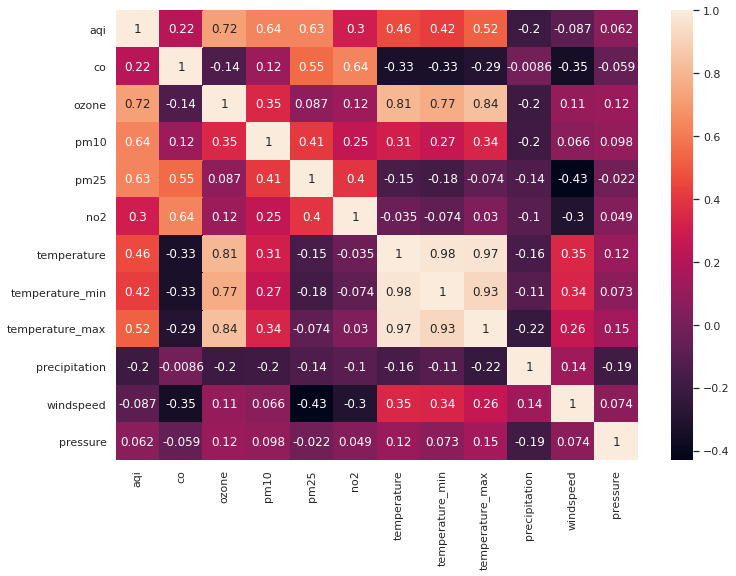

In [0]:
import seaborn as sns
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrMatrix, annot=True)

# K-Means Clustering on amalgamated data

In [0]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

[0: 'date', 1: 'aqi', 2: 'main pollutant', 3: 'location', 4: 'location id',
5: 'aqi source', 6: 'co', 7: 'ozone', 8: 'pm10', 9: 'pm25', 10: 'no2', 11: 'temperature', 12: 'temperature_min', 13: 'temperature_max', 14: 'precipitation', 15: 'windspeed', 16: 'pressure']

### Elbow method

In [0]:
def elbow_method():
    Error =[]
    x = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]].values
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i).fit(x)
        kmeans.fit(x)
        Error.append(kmeans.inertia_)
    plt.figure(figsize=(5,5))
    plt.plot(range(1, 11), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()
    

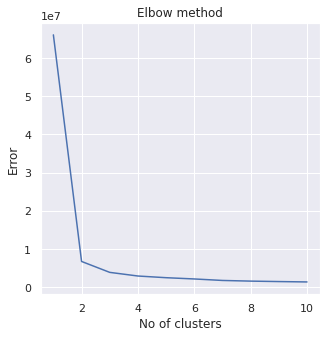

In [0]:
elbow_method()

### K-Means Clustering

In [0]:
x = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]].values
y = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]]
col = y.columns

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)
plt.figure(figsize=(5,5))
df['cluster'] = y_kmeans

# for i in range(0, 11):
#    for j in range(1, 12):
#      plt.scatter(x[:, i], x[:, j], y_kmeans, c=y_kmeans)
#      plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 50, c = 'red')
#      plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 50, c = 'blue')
#      plt.xlabel(col[i])
#      plt.ylabel(col[j])
#      plt.show()


<Figure size 360x360 with 0 Axes>

In [0]:
# df['date'] = pd.to_datetime(df['date'])
df.dtypes

date                object
aqi                float64
main pollutant      object
location            object
location id         object
aqi source          object
co                 float64
ozone                int64
pm10               float64
pm25                 int64
no2                float64
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
cluster              int32
dtype: object

In [0]:
# Add columns with year, month, and weekday name
# df = df.set_index('date')
# df['year'] = df.index.year
# df['month'] = df.index.month
# df['day'] = df.index.weekday_name
# # Display a random sampling of 5 rows
df.sample(5, random_state=5)
# select = df[df['cluster'] == 1]
# select.head()

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure,cluster
531,06/15/2017,115.0,Ozone,Mojave,06-029-0011,AQS,3.0,115,44.0,54,33.0,27.3,20.0,35.6,0.0,9.4,1013.2,0
461,04/06/2017,87.0,Ozone,Mojave,06-029-0011,AQS,3.0,87,19.0,52,37.0,22.1,14.4,27.8,0.0,9.7,1012.5,0
793,03/04/2018,43.0,Ozone,Maricopa,06-029-0008,AQS,5.0,43,3.0,25,30.0,8.3,3.3,14.4,0.0,6.8,1024.2,0
663,10/25/2017,150.0,Ozone,Edison,06-029-0007,AQS,6.0,150,83.0,82,50.0,22.6,14.4,32.8,0.0,7.6,1014.0,0
654,10/16/2017,133.0,Ozone,Edison,06-029-0007,AQS,7.0,133,75.0,92,60.0,19.8,11.1,28.9,0.0,5.8,1019.4,0


##Standardizing the data values to avoid model to have any bias on features that have very less or very large values 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
#scaledDF = df[['ozone', 'co', 'temperature', 'windspeed', 'precipitation', 'pressure', 'pm10', 'pm25', 'no2']]
scaledDF = df[['ozone', 'co', 'temperature', 'windspeed', 'pressure', 'pm10', 'pm25', 'no2', 'aqi']]
scaler.fit(scaledDF.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaledDF.head(2)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi
0,37,8.0,4.4,6.5,1020.3,52.0,148,23.0,148.0
1,37,7.0,7.1,3.6,1017.9,14.0,113,25.0,113.0


## Mean values of the respective features above

In [0]:
scaler.mean_

array([ 72.77891855,   3.33675565,  19.91177276,   9.12984257,
       973.22600958,  34.38603696,  56.66666667,  25.39561944,
        84.79603012])

## Custom function to define class labels for multiclass classification problem

In [0]:
def label_gen(x):
  if (x < 51):
    return 'Good'
  elif (x < 101):
    return 'Moderate'
  elif(x<151):
    return 'Unhealthy for sensitive groups'
  elif (x<201):
    return 'Unhealthy'
  elif (x<301):
    return 'Very Unhealthy'
  else:
    return 'Hazardous'

## Custom function to define class labels for binary class classification problem

In [0]:
def label_category(x):
  if (x < 151):
    return 0
  else:
    return 1

In [0]:
scaledDF['AQLabel'] = scaledDF['aqi'].apply(func=label_gen)
scaledDF['AQICategory'] = scaledDF['aqi'].apply(func=label_category)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## PAQI is a new column that captures the previous day's AQI value. This is the main feature in Time series forecasting where we use past data to predict a future outcome. 

In [0]:
scaledDF['PAQI'] = scaledDF.aqi.shift(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
scaledDF['AQLabel'] = pd.Categorical(scaledDF['AQLabel'])
scaledDF['AQLabel'] = scaledDF.AQLabel.cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df1 = scaledDF[['ozone', 'co', 'temperature', 'windspeed', 'pressure', 'pm10', 'pm25', 'no2', 'aqi']]

In [0]:
df1 = scaler.transform(df1)

In [0]:
df1 = pd.DataFrame(data=df1, columns=['ozone', 'co', 'temperature', 'windspeed', 'pressure', 'pm10', 'pm25', 'no2', 'aqi'])
df1.head(2)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi
0,-0.982177,1.895100,-1.987936,-0.756273,0.233657,0.673889,3.137893,-0.200856,1.684097
1,-0.982177,1.488709,-1.641914,-1.590235,0.221745,-0.779945,1.935416,-0.033170,0.751507


In [0]:
df1.head(2)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi
0,-0.982177,1.895100,-1.987936,-0.756273,0.233657,0.673889,3.137893,-0.200856,1.684097
1,-0.982177,1.488709,-1.641914,-1.590235,0.221745,-0.779945,1.935416,-0.033170,0.751507


In [0]:
df1['PAQI'] = df1.aqi.shift(1)

In [0]:
'''
scaledDF['AQLabel'] = pd.Categorical(scaledDF['AQLabel'])
scaledDF['AQLabel'] = scaledDF.AQLabel.cat.codes
'''

"\nscaledDF['AQLabel'] = pd.Categorical(scaledDF['AQLabel'])\nscaledDF['AQLabel'] = scaledDF.AQLabel.cat.codes\n"

In [0]:
df1.head(5)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi,PAQI
0,-0.982177,1.895100,-1.987936,-0.756273,0.233657,0.673889,3.137893,-0.200856,1.684097,NaN
1,-0.982177,1.488709,-1.641914,-1.590235,0.221745,-0.779945,1.935416,-0.033170,0.751507,1.684097
2,-1.009629,1.488709,-1.321522,0.681594,0.189977,-0.971239,0.801652,0.218359,-0.127792,0.751507
3,-0.982177,0.675927,-1.193365,-0.554971,0.176576,-1.009497,1.042147,0.218359,0.058726,-0.127792
4,-0.872372,0.675927,-0.949868,-0.439942,0.173598,-1.086015,-0.091617,0.386046,-0.820574,0.058726


In [0]:
df1.head(5)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi,PAQI
0,-0.982177,1.895100,-1.987936,-0.756273,0.233657,0.673889,3.137893,-0.200856,1.684097,NaN
1,-0.982177,1.488709,-1.641914,-1.590235,0.221745,-0.779945,1.935416,-0.033170,0.751507,1.684097
2,-1.009629,1.488709,-1.321522,0.681594,0.189977,-0.971239,0.801652,0.218359,-0.127792,0.751507
3,-0.982177,0.675927,-1.193365,-0.554971,0.176576,-1.009497,1.042147,0.218359,0.058726,-0.127792
4,-0.872372,0.675927,-0.949868,-0.439942,0.173598,-1.086015,-0.091617,0.386046,-0.820574,0.058726


In [0]:
decTreeDF = pd.concat([df1, scaledDF[['AQICategory', 'AQLabel']]], axis=1, sort=False)
decTreeDF.head(5)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi,PAQI,AQICategory,AQLabel
0,-0.982177,1.895100,-1.987936,-0.756273,0.233657,0.673889,3.137893,-0.200856,1.684097,NaN,0,4
1,-0.982177,1.488709,-1.641914,-1.590235,0.221745,-0.779945,1.935416,-0.033170,0.751507,1.684097,0,4
2,-1.009629,1.488709,-1.321522,0.681594,0.189977,-0.971239,0.801652,0.218359,-0.127792,0.751507,0,2
3,-0.982177,0.675927,-1.193365,-0.554971,0.176576,-1.009497,1.042147,0.218359,0.058726,-0.127792,0,2
4,-0.872372,0.675927,-0.949868,-0.439942,0.173598,-1.086015,-0.091617,0.386046,-0.820574,0.058726,0,2


In [0]:
decTreeDF = decTreeDF.drop([df1.index[0]])

In [0]:
decTreeDFX = decTreeDF[['PAQI', 'temperature','windspeed', 'pressure']]

In [0]:
decTreeDF.head(2)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi,PAQI,AQICategory,AQLabel
1,-0.982177,1.488709,-1.641914,-1.590235,0.221745,-0.779945,1.935416,-0.033170,0.751507,1.684097,0,4
2,-1.009629,1.488709,-1.321522,0.681594,0.189977,-0.971239,0.801652,0.218359,-0.127792,0.751507,0,2


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(decTreeDFX, decTreeDF.AQLabel, test_size=0.3)

In [0]:
X_train.shape

(1022, 4)

In [0]:
X_test.shape

(438, 4)

In [0]:
y_train.shape

(1022,)

##Naive Bayes Classification

In [0]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
expected = y_test
predictions = naive_bayes.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score:', accuracy_score(y_test, predictions))

Accuracy score: 0.5502283105022832


Text(89.17999999999999, 0.5, 'predicted label')

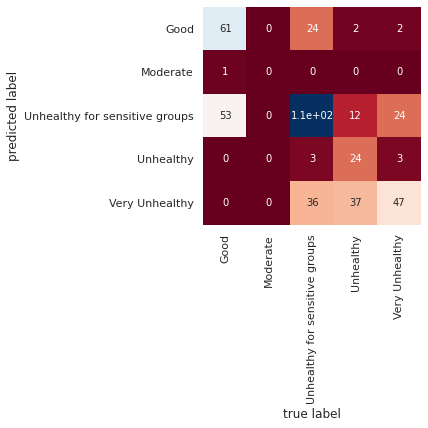

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['Good', 'Moderate','Unhealthy for sensitive groups', 'Unhealthy', 'Very Unhealthy'], yticklabels=['Good', 'Moderate','Unhealthy for sensitive groups', 'Unhealthy', 'Very Unhealthy'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [0]:
print(metrics.classification_report(expected, predictions))
print(metrics.confusion_matrix(expected, predictions))

              precision    recall  f1-score   support

           0       0.53      0.69      0.60        89
           1       0.00      0.00      0.00         1
           2       0.63      0.55      0.59       198
           3       0.32      0.80      0.46        30
           4       0.62      0.39      0.48       120

    accuracy                           0.55       438
   macro avg       0.42      0.49      0.42       438
weighted avg       0.59      0.55      0.55       438

[[ 61   0  24   2   2]
 [  1   0   0   0   0]
 [ 53   0 109  12  24]
 [  0   0   3  24   3]
 [  0   0  36  37  47]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
